# EE261 - The Fourier Transform and its Applications

## Lecture 2: <https://see.stanford.edu/Course/EE261/119>

<br />


In [4]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline  

In [2]:
a = np.matrix('1 2; 3 4')
a.transpose()

matrix([[1, 3],
        [2, 4]])

* Applicable!
* How can you use sin+cos to model complex periodic phenomena????? IDEK!!
* How general? Pretty general! Aiming quite high.
* How to model non-periodic stuff then eh?
* Homework - Apply ideas of periodicity as an approximation
* Just make signals that die out periodic by repeating the pattern! LOL!
* Force extra symetry to simplify analysis
* Periodization - Just makin' up words here!
* See HW 1
* Fix a period for this discussion - $$ 2 \pi ? , 1 ? $$
* Let's go with 1 for now.
* Functions satisfying translational symetry of 1
* Model signals $$ \sin(2 \pi t) , \cos(2 \pi t) $$
* If know a function at an interval of its period anywhere, then we know it completely
* Wow so amazing remarks are so cool
* Modify and combine sin, cos to get quite general results

### Big idea - Modification - One period - Many Frequencies

Example: Period = 1, Frequency = 1 ~ $$ \sin(2 \pi t) $$

Example: Period = 0.5,1, Frequency = 2,1 ~ $$ \sin(4 \pi t) $$

Example: Period = 1/3,1 Frequency = 3,1 ~ $$ \sin(6 \pi t) $$

etc...

### Big idea - Combination - Addition of Components

Example: $$ \sin(2 \pi t) + \sin(4 \pi t) + \sin(6 \pi t) $$

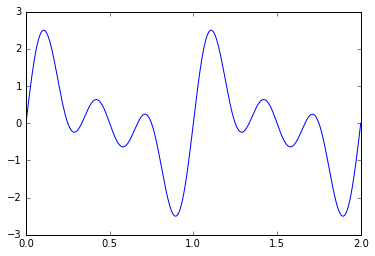

In [17]:
pi = np.pi
t = np.linspace(0, 2, 500)
plt.plot(t, np.sin(2*pi*t) + np.sin(4*pi*t) + np.sin(6*pi*t))
plt.show()

Note: 3 frequencies in this signal, but only one period!

More revealing to talk about signals in terms of frequencies as this
allows for analysis in terms of decomposition.

Also, we can modify amplitudes and phases.

So, we can modify amplitude, frequency and phases of components and sum them!!!!!

Example: $$ \sum\limits_{k=1}^n A_k \sin(2 \pi k t + \varphi_k) $$

Higher terms have higher frequencies (as in music) but period can only be 1!!

## Program sinesum2 - Plot sums - Play sounds

In [30]:
def f(t, (k,(a,p))):
    return a * np.sin(2*pi*k*t+p)

def sinesum2(t, *terms):
    components = map(lambda x: f(t,x), enumerate(terms))
    return sum(components)

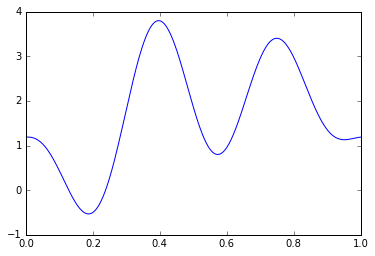

In [40]:
t = np.linspace(0, 1, 500)
plt.plot(t, sinesum2(t,(2,1),(1,4),(1,41),(1,13)))
plt.show()

Other ways of writing the sum too...

$$ \sum\limits_{k=1}^n A_k \sin(2 \pi k t + \varphi_k) = \sum\limits_{k=1}^n a_k \cos(2 \pi k t) + b_k \sin(2 \pi k t ) $$

Allow for constant terms as well.

$$ \dfrac{a_0}{2} + \sum\limits_{k=1}^n a_k \cos(2 \pi k t) + b_k \sin(2 \pi k t ) $$

a0/2 is the dc component... Electrical engineers do this...

That's because in circuit analysis, there is a direct portion of power even in ac circuits.

Not great terminoligy since there are many non-electrical applications.

Complex exponentials are another option for expression.

Better algebraically and conceptually to use
complex exponentials and write the sum that way.

Why??

Recall that

$$ e^{2 \pi i k t} = \cos(2 \pi k t) + b_k \sin(2 \pi k t ) $$

$$ {i} = \sqrt{-1} $$

Make sure that the coefficients are complex numbers that satisfy the symmetry property:

$$ C_{-k} = \bar{C_k} $$

Sum of reflections must therefore be real?

Bidirectional implication.

Notation, dagger, star, bar, etc.

We'll use bar.

Now, can we write...

$$ f(t) = \sum\limits_{k=-n}^n C_k e^{2 \pi i k t} $$

We'll find out next time.

$$ C_0 $$ is real. By implication.

##  Woah man

When doing mathematics - when asking a yes/no question,
assume yes, then work from that assumption. Follow it to its conclusions.

Using this principle here, we can isolate a term of the sum:

$$ C_m e^{2 \pi i m t} = f(t) - \sum\limits_{k \ne m} C_k e^{2 \pi i k t} $$

$$ C_m =  e^{-2 \pi i m t} f(t) - \sum\limits_{k \ne m} C_k e^{-2 \pi i m t} e^{2 \pi i k t} $$

$$ C_m =  e^{-2 \pi i m t} f(t) - \sum\limits_{k \ne m} C_k e^{2 \pi i (k-m) t} $$

Integrate both sides wrt t from 0-1... lol constants just become themselves:

$$ \int_0^1 C_m dt = \int_0^1 e^{-2 \pi i m t} f(t) - \sum\limits_{k \ne m} C_k e^{2 \pi i (k-m) t} dt $$

$$ C_m = \int_0^1 \left( e^{-2 \pi i m t} f(t) - \sum\limits_{k \ne m} C_k e^{2 \pi i (k-m) t} \right) dt $$

$$ C_m = \int_0^1 e^{-2 \pi i m t} f(t) dt - \sum\limits_{k \ne m} C_k \int_0^1 e^{2 \pi i (k-m) t} dt $$

$$  \int_0^1 e^{2 \pi i (k-m) t} dt = 0 \space \text{lol} $$

$$ C_m = \int_0^1 e^{-2 \pi i m t} f(t) dt $$